# Creating an animation
Here we want to create an animation that shows the evaporation during the year 2003, in which the summer heatwave occured

In [1]:
from cablab import Cube
from cablab.cube import CubeDataAccess
from datetime import datetime, timedelta
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML

We specify the box we want to operate on

In [2]:
lon_0, lon_1=(-10.,40.)
lat_0, lat_1=(30.,60.)
tim_0, tim_1=(datetime(2003,1,1),datetime(2004,1,1))

And we get a reference to the cube data

In [3]:
cube = Cube.open("/home/jovyan/work/datacube/cablab-datacube-0.2.3/low-res")
data = cube.data.get(variable='evaporation',longitude=(lon_0,lon_1),latitude=(lat_0,lat_1))

Here we set up the plot

(0, 3)

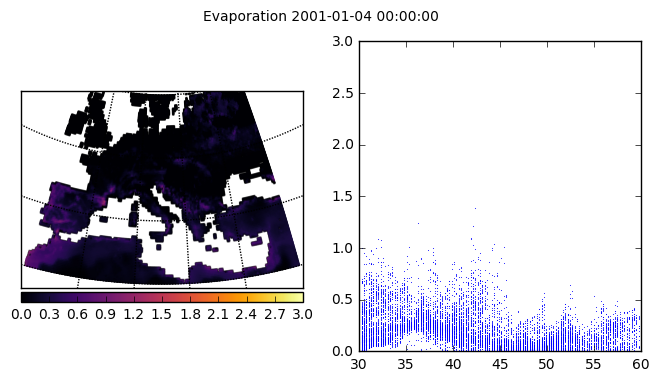

In [6]:
nt,ny,nx=data[0].shape
lon = np.linspace(lon_0,lon_1,nx)
lat = np.linspace(lat_1,lat_0,ny)
lons, lats = np.meshgrid(lon,lat)

def datefromtimestep(i):
    return datetime(2001+i//46,1,4)+timedelta(8*(i%46))

fig = plt.figure(figsize=(8, 4),facecolor='white')
fig.suptitle('Evaporation ' + str(datefromtimestep(0)))
axmap = plt.subplot(121)
m = Basemap(projection='stere',lat_ts=(lat_0+lat_1)/2,\
    lon_0=(lon_0+lon_1)/2,lat_0=(lat_0+lat_1)/2,width=5000000,height=3500000, \
    rsphere=6371200.,area_thresh=10000,resolution=None)

dcur=tim_0
dmasked = ma.masked_where(np.isnan(data[0][1,:,:]),data[0][1,:,:])
mpplot    = m.pcolormesh(lons,lats,dmasked,shading='gouraud',cmap=plt.cm.inferno,latlon=True,vmin=0,vmax=3)
m.drawparallels(np.arange(30.,61. ,10.))
m.drawmeridians(np.arange(0. ,31. ,10.))
cb      = m.colorbar(mpplot, "bottom", size="5%", pad="2%")

axscatter = plt.subplot(122)
scplot, = plt.plot(lats.ravel(),dmasked.ravel(),".",markersize=0.5)
plt.ylim(0,3)

Then we define a function that updates the plot data for each time step and create an animation

In [8]:
def animate(iter):
    global dcur
    z = mpplot.get_array()
    data_next = data[0][iter,:,:].data
    z.data[:] = data_next.ravel()
    mpplot.set_array(z)
    scplot.set_data((lats,data_next.ravel()))
    fig.suptitle('Evaporation ' + str(datefromtimestep(iter)))
    return mpplot,scplot

anim = animation.FuncAnimation(fig,animate,frames=46,interval=500,blit=True)
HTML(anim.to_html5_video())